<a href="https://colab.research.google.com/github/nezz244/EEE4113F_Group_27_Design_Project/blob/main/Transfer_learning_using_keras_on_flowers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [32]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [33]:
!ls '/content/gdrive'
data_dir= '/content/gdrive/MyDrive/flower_photos/'


MyDrive  Othercomputers


In [34]:
print(data_dir)

/content/gdrive/MyDrive/flower_photos/


/content/gdrive/MyDrive/flower_photos/roses/7551637034_55ae047756_n.jpg


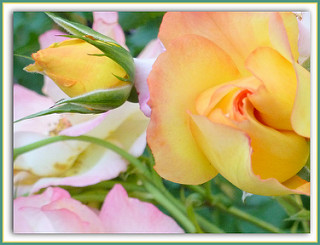

In [37]:
roses = glob(data_dir +'roses/*')
print(roses[2])
PIL.Image.open(str(roses[2]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


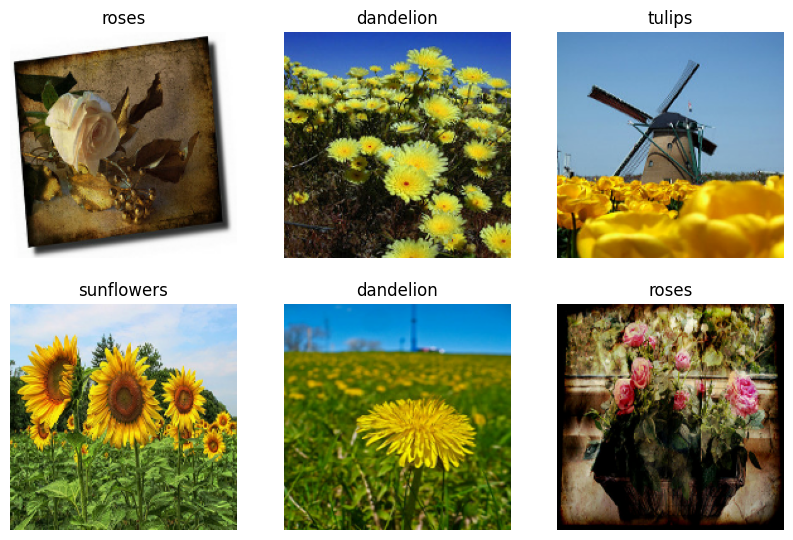

In [8]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [10]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [15]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 554s 6s/step - loss: 0.5960 - accuracy: 0.8007 - val_loss: 0.3928 - val_accuracy: 0.8678
Epoch 2/10
92/92 [==============================] - 546s 6s/step - loss: 0.2663 - accuracy: 0.9033 - val_loss: 0.3861 - val_accuracy: 0.8447
Epoch 3/10
92/92 [==============================] - 543s 6s/step - loss: 0.1672 - accuracy: 0.9414 - val_loss: 0.4006 - val_accuracy: 0.8515
Epoch 4/10
92/92 [==============================] - 538s 6s/step - loss: 0.1237 - accuracy: 0.9571 - val_loss: 0.3510 - val_accuracy: 0.8733
Epoch 5/10
92/92 [==============================] - 545s 6s/step - loss: 0.0580 - accuracy: 0.9864 - val_loss: 0.4093 - val_accuracy: 0.8719
Epoch 6/10
92/92 [==============================] - 544s 6s/step - loss: 0.0339 - accuracy: 0.9932 - val_loss: 0.4189 - val_accuracy: 0.8692
Epoch 7/10
92/92 [==============================] - 543s 6s/step - loss: 0.0168 - accuracy: 0.9986 - val_loss: 0.3897 - val_accuracy: 0.8760
Epoch 8/10
92

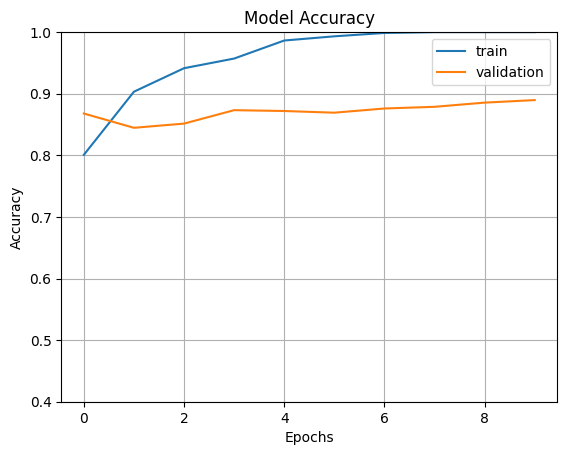

In [18]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

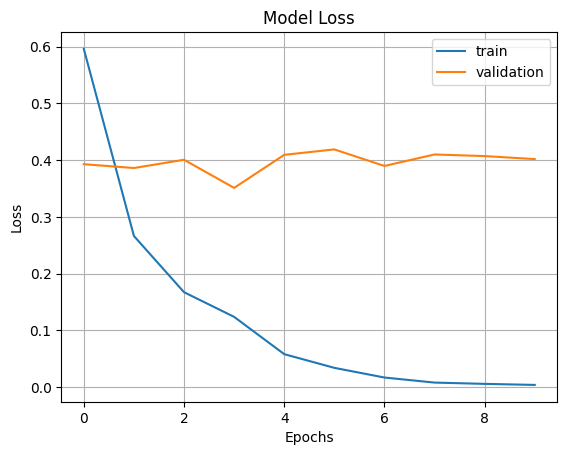

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [29]:

import cv2
image=cv2.imread(str(dandelion[18]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [30]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 165ms/step
[[5.9787951e-08 9.9999988e-01 1.1781436e-08 1.1069403e-09 1.2640312e-08]]


The predicted class is dandelion


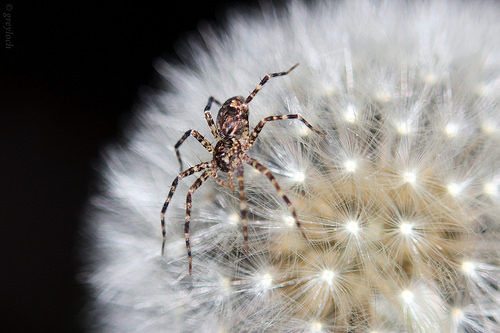

In [31]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

PIL.Image.open(str(dandelion[18]))


Model trained, next step try do the same for different types of data and pictures, also write code for predicting 3000 images and time it , we need 3000 images per second.